# <center>Loan Approval Prediction- DMT Final Project</center>

# Cleaning and Data Preprocessing for dataset-1


In [ ]:
import pandas as pd

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving loan_approval_dataset_1.csv to loan_approval_dataset_1 (1).csv


In [ ]:
import warnings
warnings.filterwarnings('ignore')


In [ ]:
import io

In [ ]:
# Load the dataset

for fname, content in uploaded.items():
    loan_data = pd.read_csv(io.StringIO(content.decode('utf-8')), index_col=False)

In [ ]:
#printing the top 5 rows
loan_data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
#printing the columns in the dataset
loan_data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [ ]:
# Remove spaces from column names
loan_data.columns = loan_data.columns.str.strip()

# Print the modified column names
loan_data.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [ ]:
# Get the number of unique values for each column
unique_value_counts = loan_data.nunique()

# Print the number of unique values for each column
unique_value_counts

loan_id                     4269
no_of_dependents               6
education                      2
self_employed                  2
income_annum                  98
loan_amount                  378
loan_term                     10
cibil_score                  601
residential_assets_value     278
commercial_assets_value      188
luxury_assets_value          379
bank_asset_value             146
loan_status                    2
dtype: int64

In [ ]:
#Get the number of null values for each column
loan_data.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [ ]:
#Get the datatypes of each column
loan_data.dtypes

loan_id                      int64
no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object

In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
# Get unique values for each column for the columns that are not of the type int
unique_education = loan_data['education'].unique()
unique_self_employed = loan_data['self_employed'].unique()
unique_loan_status = loan_data['loan_status'].unique()

In [ ]:
# Print the unique values for each column
print("Unique education:", unique_education)
print("Unique self_employed:", unique_self_employed)
print("Unique loan_status:", unique_loan_status)

Unique education: [' Graduate' ' Not Graduate']
Unique self_employed: [' No' ' Yes']
Unique loan_status: [' Approved' ' Rejected']


In [ ]:
# Mapping for education, self_employed, and loan_status and converting to int
education_mapping = {' Graduate': 1, ' Not Graduate': 0}
self_employed_mapping = {' Yes': 1, ' No': 0}
loan_status_mapping = {' Approved': 1, ' Rejected': 0}

# Apply mappings and rename columns
loan_data['education'] = loan_data['education'].map(education_mapping)
loan_data['self_employed'] = loan_data['self_employed'].map(self_employed_mapping)
loan_data['loan_status'] = loan_data['loan_status'].map(loan_status_mapping)

# Rename the columns
loan_data.rename(columns={'education': 'education_numeric',
                          'self_employed': 'self_employed_numeric',
                          'loan_status': 'loan_status_numeric'}, inplace=True)



In [ ]:
# Check the updated DataFrame to see that all are of the type int
loan_data.head()

,loan_id,no_of_dependents,education_numeric,self_employed_numeric,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status_numeric
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [ ]:
# @title Applying models for Dataset - 1

In [ ]:
# @title 1.Logistic Regression for Dataset-1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, classification_report
import matplotlib.pyplot as plt

In [ ]:
X = loan_data.drop(columns=['loan_id', 'loan_status_numeric'])
y = loan_data['loan_status_numeric']

In [ ]:
X.head()

,no_of_dependents,education_numeric,self_employed_numeric,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000


In [ ]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: loan_status_numeric, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

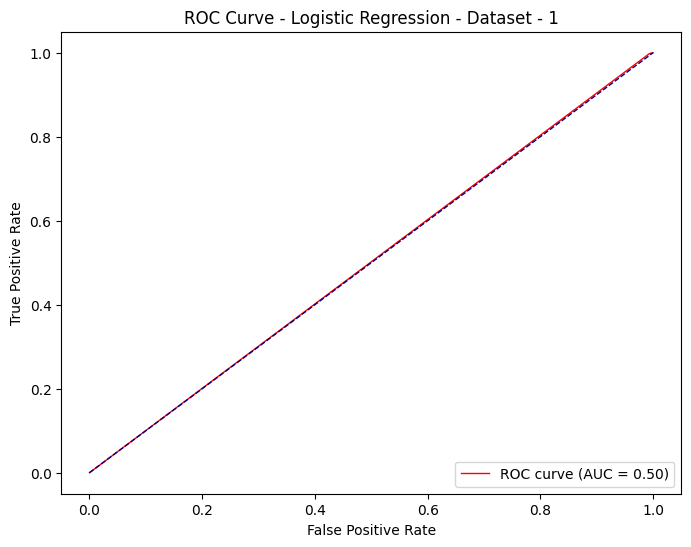

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=1, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression - Dataset - 1')
plt.legend(loc='lower right')
plt.show()

In [ ]:
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print("Classification Report - Logistic Regeression - Dataset - 1:")
print(classification_rep)

Classification Report - Logistic Regeression - Dataset - 1:
              precision    recall  f1-score   support

           0       0.67      0.01      0.01       318
           1       0.63      1.00      0.77       536

    accuracy                           0.63       854
   macro avg       0.65      0.50      0.39       854
weighted avg       0.64      0.63      0.49       854



**Random** Forest


In [ ]:
# @title Random forest for dataset-1

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Split the data into features (X) and target (y)
X = loan_data.drop(columns=['loan_id', 'loan_status_numeric'])
y = loan_data['loan_status_numeric']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

In [ ]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9800936768149883


In [ ]:
# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       318
           1       0.98      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [ ]:
# Calculate ROC curve and AUC score
y_prob = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

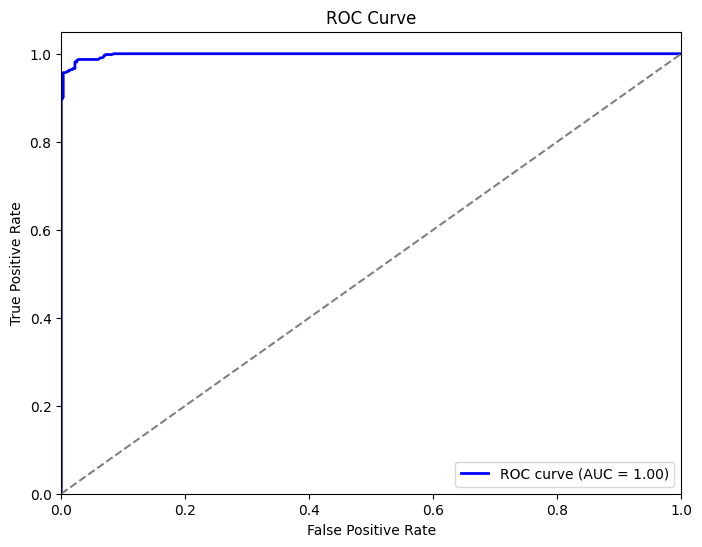

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Decision Trees for Dataset-1

In [ ]:
#Decision Trees Classifier for Data Set 1

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X = loan_data.drop(columns=['loan_id', 'loan_status_numeric'])
y = loan_data['loan_status_numeric']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
dtree= DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_predictions= dtree.predict(X_test)

In [ ]:
print(classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.98      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [ ]:
y_prob = dtree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

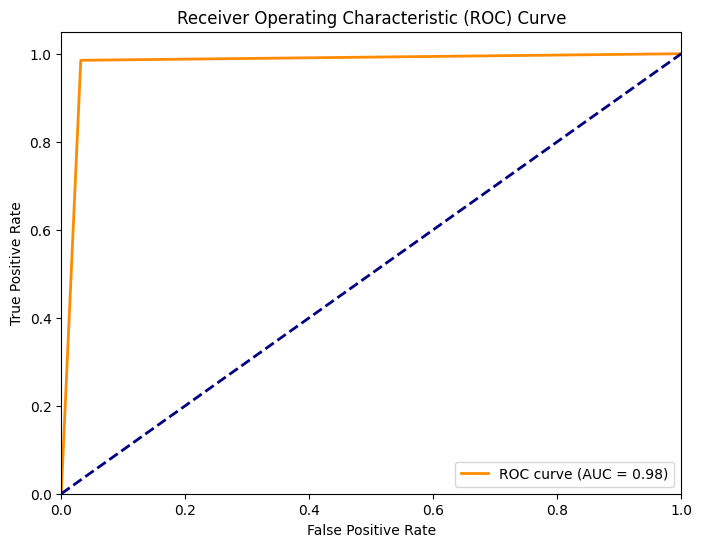

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

K-Means for Dataset-1

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
loan_data.head()

,loan_id,no_of_dependents,education_numeric,self_employed_numeric,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status_numeric
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [ ]:
X = loan_data.drop(columns=['loan_id', 'loan_status_numeric'])
y = loan_data['loan_status_numeric']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
train_cluster_labels = kmeans.predict(X_train)
test_cluster_labels = kmeans.predict(X_test)

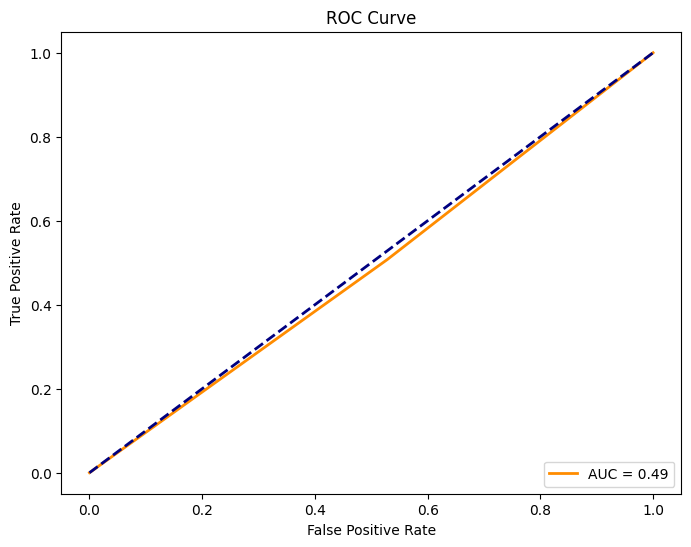

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, test_cluster_labels)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(y_test, test_cluster_labels))

Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.47      0.41       318
           1       0.62      0.51      0.56       536

    accuracy                           0.49       854
   macro avg       0.49      0.49      0.48       854
weighted avg       0.52      0.49      0.50       854



Dataset-2

In [ ]:
# Choose the file from your local machine
uploaded = files.upload()

Saving loan_dataset_3.csv to loan_dataset_3 (2).csv


In [ ]:
# Load the dataset
for filename, content in uploaded.items():
    loan_data_3 = pd.read_csv(io.StringIO(content.decode('utf-8')), index_col=False)

In [ ]:
# @title Cleaning and Data Preprocessing for dataset-2

In [ ]:
# Drop the first column
loan_data_3 = loan_data_3.drop(columns=['Unnamed: 0'])

In [ ]:
# Display the first few rows of the modified DataFrame
loan_data_3.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


In [ ]:
loan_data_3.isnull().sum()

Loan_ID               0
Gender               10
Married               1
Dependents            9
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term     13
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
loan_data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            491 non-null    object 
 1   Gender             481 non-null    object 
 2   Married            490 non-null    object 
 3   Dependents         482 non-null    object 
 4   Education          491 non-null    object 
 5   Self_Employed      462 non-null    object 
 6   ApplicantIncome    491 non-null    int64  
 7   CoapplicantIncome  491 non-null    float64
 8   LoanAmount         475 non-null    float64
 9   Loan_Amount_Term   478 non-null    float64
 10  Credit_History     448 non-null    float64
 11  Property_Area      491 non-null    object 
 12  Loan_Status        491 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 50.0+ KB


In [ ]:
# Numeric Columns fill the null values
loan_data_3['LoanAmount'].fillna(loan_data_3['LoanAmount'].mean(), inplace=True)
loan_data_3['Loan_Amount_Term'].fillna(loan_data_3['Loan_Amount_Term'].mean(), inplace=True)
loan_data_3['Credit_History'].fillna(loan_data_3['Credit_History'].mode()[0], inplace=True)

In [ ]:
# Categorical Columns fill the null values
loan_data_3['Gender'].fillna(loan_data_3['Gender'].mode()[0], inplace=True)
loan_data_3['Married'].fillna(loan_data_3['Married'].mode()[0], inplace=True)
loan_data_3['Dependents'].fillna(loan_data_3['Dependents'].mode()[0], inplace=True)
loan_data_3['Self_Employed'].fillna(loan_data_3['Self_Employed'].mode()[0], inplace=True)


In [ ]:
loan_data_3.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
loan_data_3.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.000000,1.0,Semiurban,1
1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.000000,1.0,Rural,1
2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.000000,1.0,Urban,0
3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,341.297071,1.0,Urban,1
4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.000000,1.0,Semiurban,1


In [ ]:
unique_gender = loan_data_3['Gender'].unique()
unique_married = loan_data_3['Married'].unique()
unique_dependents = loan_data_3['Dependents'].unique()
unique_education = loan_data_3['Education'].unique()
unique_self_employed = loan_data_3['Self_Employed'].unique()
unique_property_area = loan_data_3['Property_Area'].unique()


In [ ]:

print("Unique values in 'Gender':", unique_gender)
print("Unique values in 'Married':", unique_married)
print("Unique values in 'Dependents':", unique_dependents)
print("Unique values in 'Education':", unique_education)
print("Unique values in 'Self_Employed':", unique_self_employed)
print("Unique values in 'Property_Area':", unique_property_area)


Unique values in 'Gender': ['Female' 'Male']
Unique values in 'Married': ['No' 'Yes']
Unique values in 'Dependents': ['0' '3+' '2' '1']
Unique values in 'Education': ['Graduate' 'Not Graduate']
Unique values in 'Self_Employed': ['No' 'Yes']
Unique values in 'Property_Area': ['Semiurban' 'Rural' 'Urban']


In [ ]:
# Create mapping dictionaries
gender_mapping = {'Male': 1, 'Female': 0}
married_mapping = {'Yes': 1, 'No': 0}
dependents_mapping = {'0': 0, '1': 1, '2': 2, '3+': 3}
education_mapping = {'Graduate': 1, 'Not Graduate': 0}
self_employed_mapping = {'Yes': 1, 'No': 0}
property_area_mapping = {'Semiurban': 0, 'Rural': 1, 'Urban': 2}

# Apply mappings to the DataFrame
loan_data_3['Gender'] = loan_data_3['Gender'].map(gender_mapping)
loan_data_3['Married'] = loan_data_3['Married'].map(married_mapping)
loan_data_3['Dependents'] = loan_data_3['Dependents'].map(dependents_mapping)
loan_data_3['Education'] = loan_data_3['Education'].map(education_mapping)
loan_data_3['Self_Employed'] = loan_data_3['Self_Employed'].map(self_employed_mapping)
loan_data_3['Property_Area'] = loan_data_3['Property_Area'].map(property_area_mapping)



In [ ]:
# Display the modified DataFrame
loan_data_3.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002305,0,0,0,1,0,4547,0.0,115.0,360.000000,1.0,0,1
1,LP001715,1,1,3,0,1,5703,0.0,130.0,360.000000,1.0,1,1
2,LP002086,0,1,0,1,0,4333,2451.0,110.0,360.000000,1.0,2,0
3,LP001136,1,1,0,0,1,4695,0.0,96.0,341.297071,1.0,2,1
4,LP002529,1,1,2,1,0,6700,1750.0,230.0,300.000000,1.0,0,1


In [ ]:
X = loan_data_3.drop(columns=['Loan_ID','Loan_Status'])
y = loan_data_3['Loan_Status']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# @title Logistic Regression for Dataset-2

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

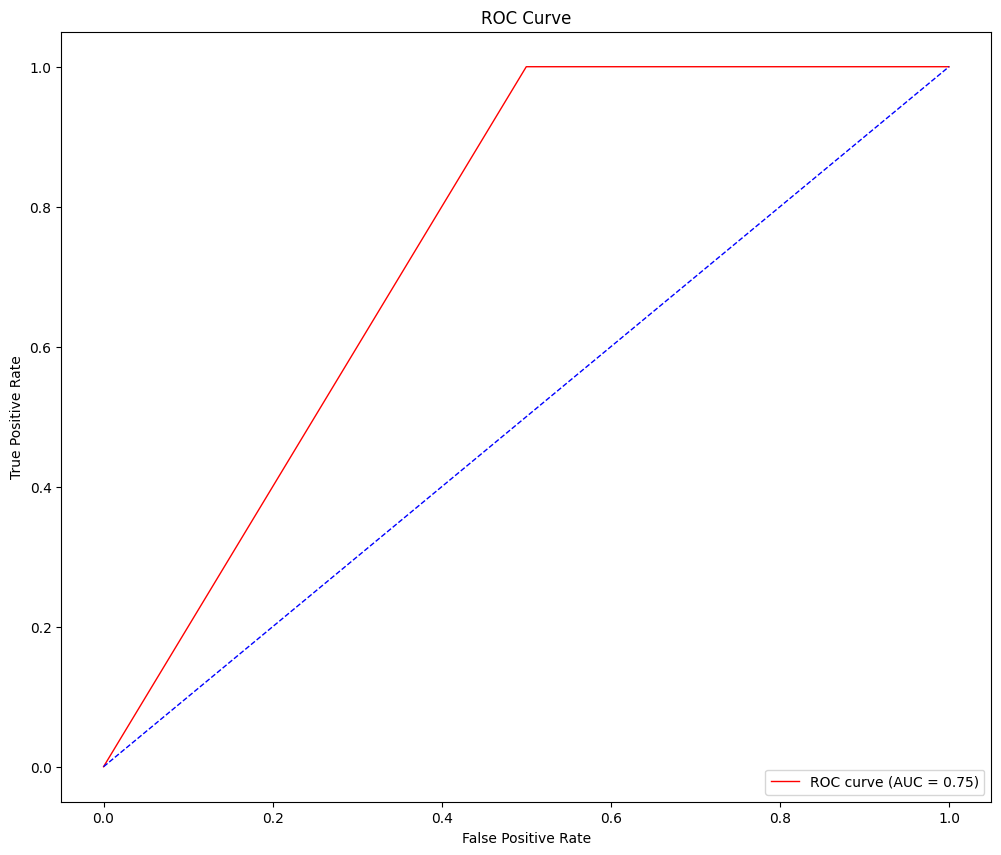

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(12, 10))
plt.plot(fpr, tpr, color='red', lw=1, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
na

In [ ]:
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)

print("Classification Report - Dataset - 2 - Logistic - Regression:")
print(report)

Classification Report - Dataset - 2 - Logistic - Regression:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        34
           1       0.79      1.00      0.88        65

    accuracy                           0.83        99
   macro avg       0.90      0.75      0.78        99
weighted avg       0.86      0.83      0.81        99



In [ ]:
X = loan_data_3.drop(columns=['Loan_ID','Loan_Status'])
y = loan_data_3['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#@title Random Forest for dataset-2

In [ ]:

# Train a Random Forest classifier
rf_classifier_3 = RandomForestClassifier(random_state=42)
rf_classifier_3.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the testing data
y_pred_3 = rf_classifier_3.predict(X_test)


In [ ]:

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_3)
print("Accuracy:", accuracy)


Accuracy: 0.797979797979798


In [ ]:

# Generate a classification report
class_report = classification_report(y_test, y_pred_3)
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.56      0.66        34
           1       0.80      0.92      0.86        65

    accuracy                           0.80        99
   macro avg       0.80      0.74      0.76        99
weighted avg       0.80      0.80      0.79        99



In [ ]:

# Compute ROC curve and AUC
y_prob_3 = rf_classifier_3.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_3)
roc_auc = auc(fpr, tpr)


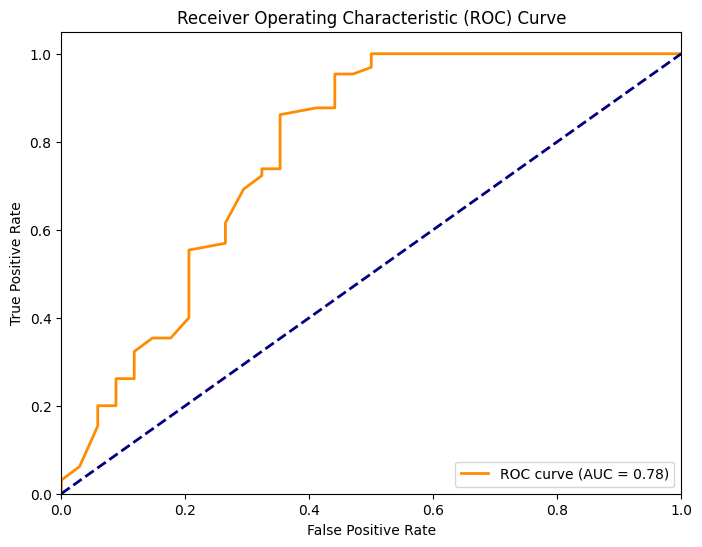

In [ ]:

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



In [ ]:
#@title Decision Trees Classifier for dataset 3

In [ ]:
X = loan_data_3.drop(columns=['Loan_ID', 'Loan_Status'])
y = loan_data_3['Loan_Status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
dtree= DecisionTreeClassifier(max_leaf_nodes=2)

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=2)

In [ ]:
y_predictions= dtree.predict(X_test)

In [ ]:
print(classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        34
           1       0.79      1.00      0.88        65

    accuracy                           0.83        99
   macro avg       0.90      0.75      0.78        99
weighted avg       0.86      0.83      0.81        99



In [ ]:
y_prob = dtree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

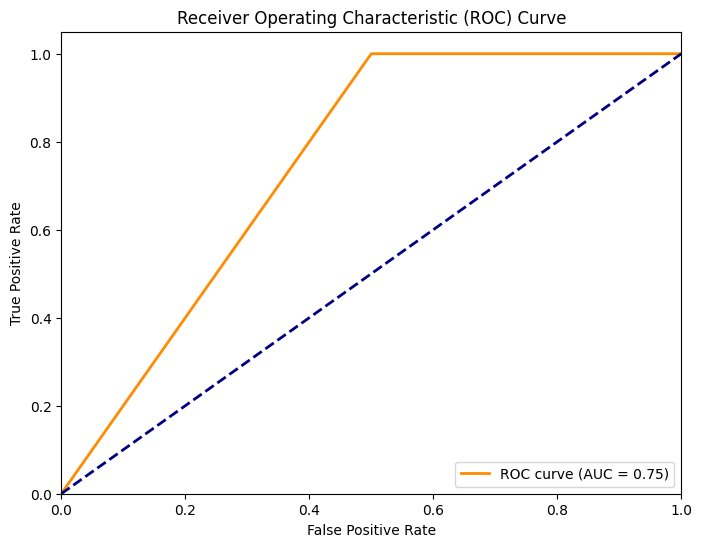

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# K-means for 2nd dataset


In [ ]:
X = loan_data_3.drop(columns=['Loan_ID', 'Loan_Status'])
y = loan_data_3['Loan_Status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
train_cluster_labels = kmeans.predict(X_train)
test_cluster_labels = kmeans.predict(X_test)

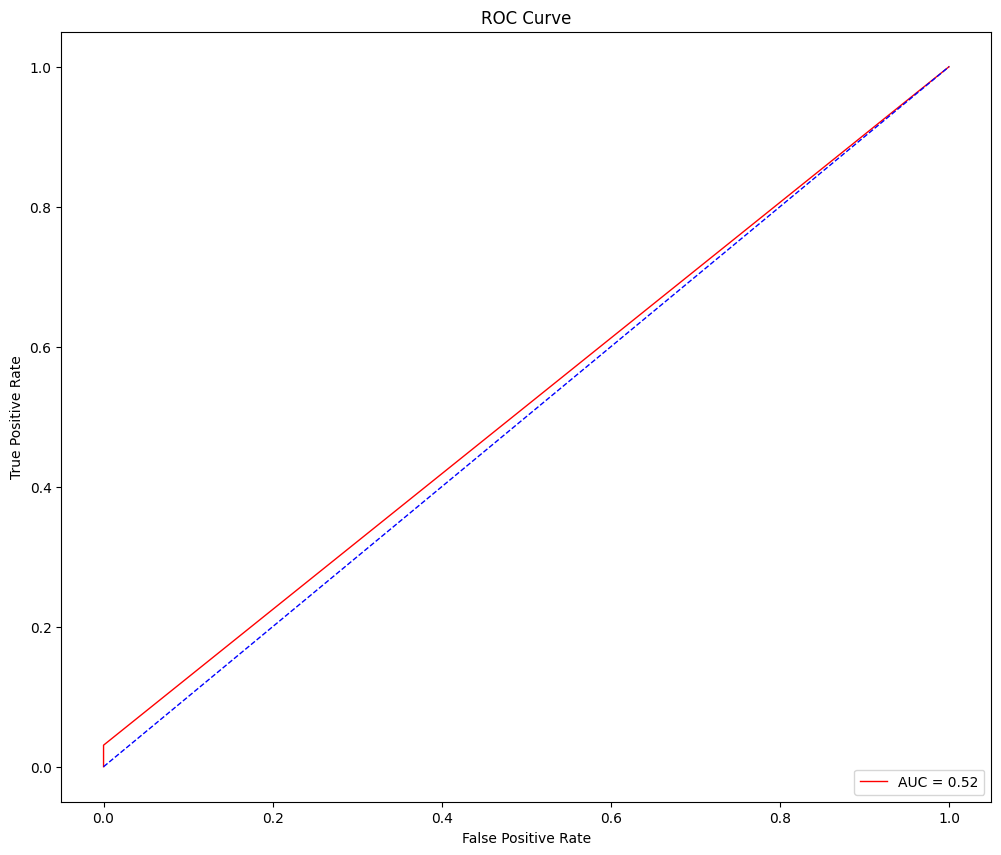

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, test_cluster_labels)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12,10))
plt.plot(fpr, tpr, color='red', lw=1, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
print("Classification Report:")
print(classification_report(y_test, test_cluster_labels))

Classification Report:
              precision    recall  f1-score   support

           0       0.35      1.00      0.52        34
           1       1.00      0.03      0.06        65

    accuracy                           0.36        99
   macro avg       0.68      0.52      0.29        99
weighted avg       0.78      0.36      0.22        99

